# **TA #1 - Python version**

## Foundation of Econometrics - DSDM 2025-2026

**Lucia Sauer**

**Contact:** [lucia.sauer@bse.eu](mailto:lucia.sauer@bse.eu)

In this notebook we will review:

+ Matrix manipulation: linear systems in matrix form
+ Density Histograms


## Importing necessary libraries

In [48]:
import numpy as np              
import pandas as pd            
import matplotlib.pyplot as plt        
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 1. Matrix manipulation

Solving a system of equations in Python

`Example 1`

Consider the system of equations:

\begin{aligned}
    2x_1 + 3x_2 &= 5 \\
    4x_1 + x_2 &= 6
\end{aligned}

In [49]:
# Define matrix A and vector b
A = np.array([[2, 3], [4, 1]])
b = np.array([5, 6])

# Transpose of A
A_transpose = np.transpose(A)
print('A: \n', A)
print('A transpose: \n', A_transpose)

# Inverse of A
A_inverse = np.linalg.inv(A)
print('A inverse: \n', A_inverse)

# Matrix multiplication
x = np.dot(A_inverse, b)

print("Solution: \n", x)

A: 
 [[2 3]
 [4 1]]
A transpose: 
 [[2 4]
 [3 1]]
A inverse: 
 [[-0.1  0.3]
 [ 0.4 -0.2]]
Solution: 
 [1.3 0.8]


`Example 2`

Consider the following system:

\begin{aligned}
    x_1 + x_2 + x_3 &= 6 \\
    2x_1 - x_2 + 3x_3 &= 14 \\
    -x_1 + 4x_2 + x_3 &= 8
\end{aligned}

In [50]:
# Define matrix A and vector b
A = np.array([[1, 1, 1], [2, -1, 3], [-1, 4, 1]])
b = np.array([6, 14, 8])

# Solve the system
x = np.linalg.solve(A, b)

print("Solution: \n", x)

Solution: 
 [0.36363636 0.90909091 4.72727273]


`Example 3`

Consider the following system:

\begin{aligned}
    x_1 + x_2 + x_3 + x_4 &= 2 \\
    x_1 - x_2 + x_3 &= 0 \\
    x_1 + x_3 + x_4 &= 1 \\
    2x_1 + 2x_2 + 2x_3 + 2x_4 &= 4
\end{aligned}

In [51]:
# Define matrix A and vector b for a system with no unique solution
A = np.array([[1, 1, 1, 1], 
              [1, -1, 1, 0], 
              [1, 0, 1, 1], 
              [2, 2, 2, 2]])
b = np.array([2, 0, 1, 4])

# Solve the system
try:
    x = np.linalg.solve(A, b)
    print("Solution: ", x)
except np.linalg.LinAlgError:
    print("This system does not have a unique solution.")

This system does not have a unique solution.


# 2. Frequency vs Density Histograms

`Frequency Histogram:`
$$ h_i = f_i $$
The heights of the bars represent the number of observations in each bin.

`Relative Frequency Histogram:`
$$ h_i = \frac{f_i}{N} $$
The heights of the bars represent the proportion of observations in each bin relative to the total number of observations.

`Density Histogram:`
$$ h_i = \frac{f_i}{w_i \cdot N} $$
The heights of the bars represent the density of observations in each bin.

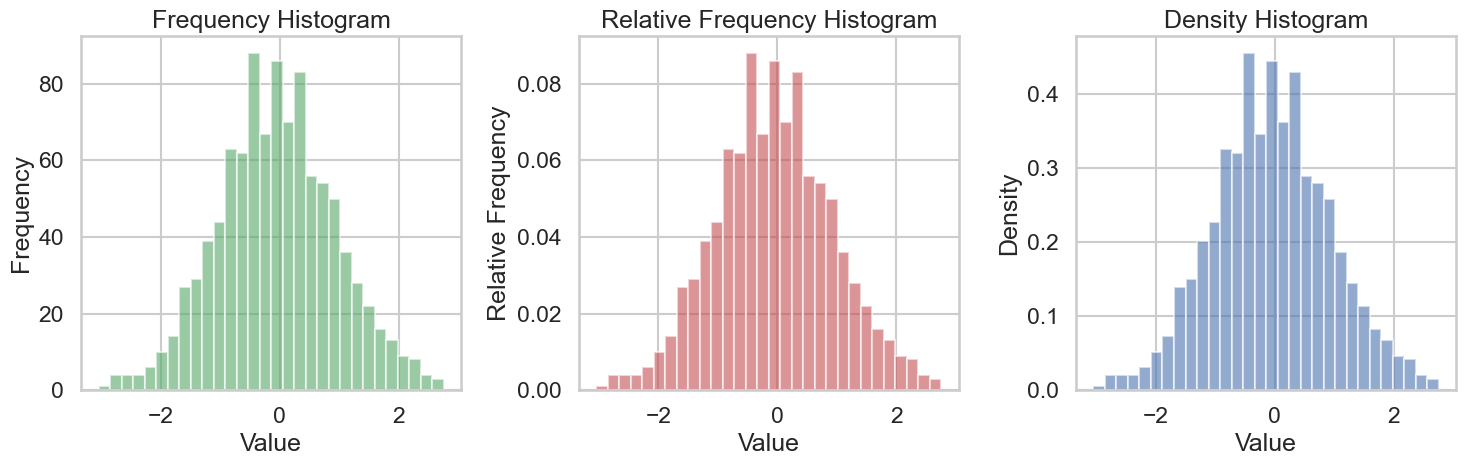

In [52]:
# Generate random variables from N(0,1)
np.random.seed(0)
data = np.random.randn(1000)

# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

# Frequency Histogram
axs[0].hist(data, bins=30, alpha=0.6, color='g')
axs[0].set_title('Frequency Histogram')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Relative Frequency Histogram
weights = np.ones_like(data) / len(data)
axs[1].hist(data, bins=30, weights=weights, alpha=0.6, color='r')
axs[1].set_title('Relative Frequency Histogram')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Relative Frequency')

# Density Histogram
axs[2].hist(data, bins=30, density=True, alpha=0.6, color='b')
axs[2].set_title('Density Histogram')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')

plt.show()

## 2.1 Binwidth 

In [53]:
import ipywidgets as widgets

# Generate random variables from N(0,1)
np.random.seed(0)
data = np.random.randn(1000)

def plot_hist(bin_width):
    plt.figure(figsize=(8,5))
    # Calculate the number of bins from bin width
    range_width = np.max(data) - np.min(data)
    nbins = int(range_width / bin_width)
    plt.hist(data, bins=nbins, density=True, alpha=0.6, color='g')
    plt.title('Interactive Density Histogram')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

bin_width_slider = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.5, description='Bin Width:')
widgets.interactive(plot_hist, bin_width=bin_width_slider)

interactive(children=(FloatSlider(value=0.5, description='Bin Width:', max=1.0, min=0.1), Output()), _dom_clas…

## 2.2 Kernel

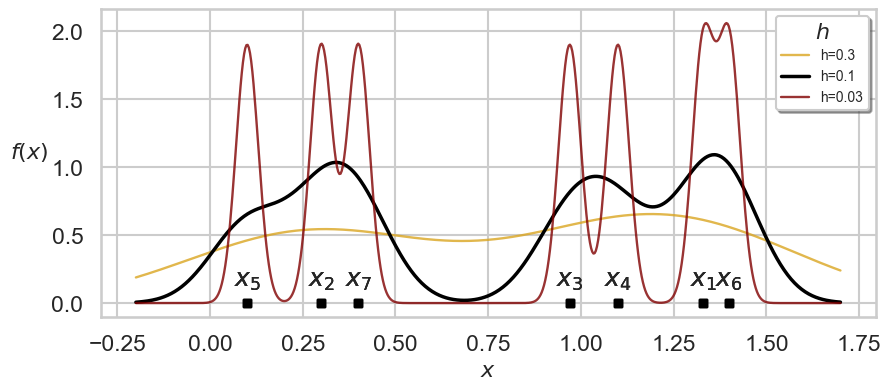

In [54]:
# the Kernel function (Gaussian kernel)
def K(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# dummy dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min() - 0.3, dataset.max() + 0.3, num=600)

# bandwidth values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwidth values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7, 2.5, 1.7]

plt.figure(figsize=(10, 4))

# iterate over bandwidth values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = np.zeros_like(x_range)  # Create an array to accumulate the kernel values
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)  # Add the kernel density contribution from each data point
        plt.annotate(r'$x_{}$'.format(i + 1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18)

    y_range = total_sum / (h * n_samples)  # KDE formula
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'h={h}')

    plt.plot(dataset, np.zeros_like(dataset), 's', 
             markersize=6, color='black')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16, rotation='horizontal', labelpad=16)
plt.legend(fontsize=10, shadow=True, title='$h$', title_fontsize=16)
plt.grid(True)
plt.show()